In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/Dareen/Downloads/hotel_bookings.csv')

In [ ]:
data.shape

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
for i in data.columns:
    if len(data[i].unique()) < 10:
        print(i+' {}'.format(len(data[i].unique())))


hotel 2
is_canceled 2
arrival_date_year 3
children 6
babies 5
meal 5
market_segment 8
distribution_channel 5
is_repeated_guest 2
deposit_type 3
customer_type 4
required_car_parking_spaces 5
total_of_special_requests 6
reservation_status 3


In [6]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
binary =['hotel','is_canceled','is_repeated_guest'] 
for i in binary:
    data[i]=lb.fit_transform(data[i])

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

categorical =["arrival_date_year",'children','babies','meal',
              'market_segment','distribution_channel','deposit_type',
              'customer_type','required_car_parking_spaces',
              'total_of_special_requests','reservation_status'] 
for i in categorical:
    data[i]=le.fit_transform(data[i])



In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int32  
 1   is_canceled                     119390 non-null  int32  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
data['arrival_date_month'].unique()


array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [10]:
data['arrival_date_month']=le.fit_transform(data['arrival_date_month'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int32  
 1   is_canceled                     119390 non-null  int32  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int32  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:

data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data['year'] = data['reservation_status_date'].dt.year
data['month'] = data['reservation_status_date'].dt.month
data['day'] = data['reservation_status_date'].dt.day
data=data.drop("reservation_status_date",axis=1)

In [13]:
data['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [14]:
data['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [15]:
room_type=['reserved_room_type','assigned_room_type']
for i in room_type:
    data[i]=le.fit_transform(data[i])
    

In [16]:
len(data['country'].unique())

178

In [17]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [18]:
data = data.drop(['agent','company'] ,axis=1)

In [19]:
data['country'].fillna('PRT',inplace= True)
data['country'].isna().sum()

0

In [20]:
(data['adults'] == 0).sum()

403

In [21]:
data = data[data['adults'] != 0]

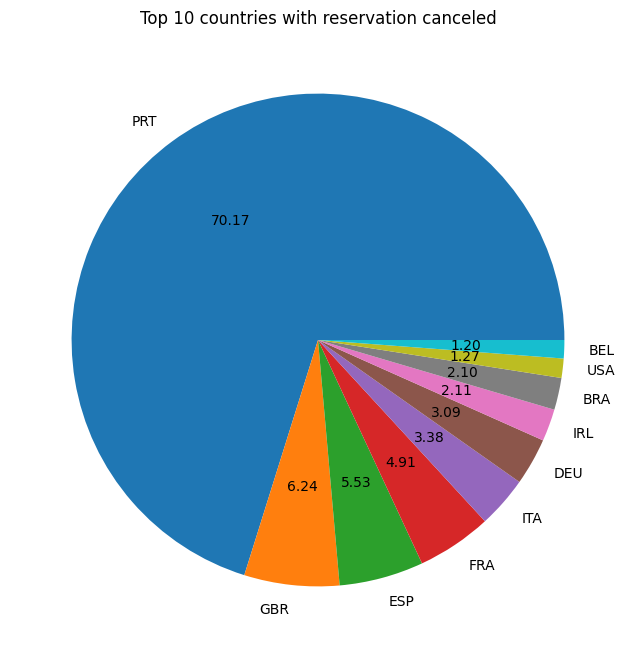

In [22]:
cancelled_data= data[data['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8, 8))
plt.title('Top 10 countries with reservation canceled', color="black")
plt.pie(top_10_country, autopct='%.2f', labels=top_10_country.index)
plt.show()

In [23]:
data['country']=le.fit_transform(data['country'])

In [42]:
correlations = data.corr()['is_canceled']
print(correlations)


hotel                            -0.137260
is_canceled                       1.000000
lead_time                         0.292983
arrival_date_year                 0.016450
arrival_date_month               -0.001407
arrival_date_week_number          0.008323
arrival_date_day_of_month        -0.005878
stays_in_weekend_nights          -0.001388
stays_in_week_nights              0.025348
adults                            0.058891
children                          0.005228
babies                           -0.034275
meal                             -0.017134
country                           0.268397
market_segment                    0.059326
distribution_channel              0.167791
is_repeated_guest                -0.083797
previous_cancellations            0.110222
previous_bookings_not_canceled   -0.057413
reserved_room_type               -0.062293
assigned_room_type               -0.176147
booking_changes                  -0.144863
deposit_type                      0.469187
days_in_wai

In [24]:
y = data['is_canceled']
x=data.drop("is_canceled",axis=1)

In [25]:
from  sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
pred = log.predict(x_test)

In [28]:
from sklearn.metrics import f1_score,accuracy_score,classification_report
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85     16301
           1       0.65      0.77      0.71      7497

    accuracy                           0.80     23798
   macro avg       0.77      0.79      0.78     23798
weighted avg       0.81      0.80      0.80     23798



In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],               
    'penalty': ['l1', 'l2']   
}
grid_search = GridSearchCV(estimator=log, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Dareen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Dareen\AppData\Local\Programs\Pyt

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [30]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test set accuracy:", test_score)

Best parameters: {'C': 100, 'penalty': 'l2'}
Best cross-validation score: 0.8013321606593975
Test set accuracy: 0.8009916799731069


In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [32]:
predknn = knn.predict(x_test)

In [33]:
print(classification_report(predknn,y_test))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89     16218
           1       0.74      0.86      0.80      7580

    accuracy                           0.86     23798
   macro avg       0.84      0.86      0.85     23798
weighted avg       0.87      0.86      0.86     23798



In [34]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'metric': ['euclidean', 'manhattan']  

}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test set accuracy:", test_score)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Best cross-validation score: 0.887676123687301
Test set accuracy: 0.8911673249852928


In [35]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
predrf=rf.predict(x_test)
print(classification_report(predrf,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15002
           1       1.00      1.00      1.00      8796

    accuracy                           1.00     23798
   macro avg       1.00      1.00      1.00     23798
weighted avg       1.00      1.00      1.00     23798



In [37]:
param_grid = {
    'n_estimators': [50, 100, 200],        
    'max_depth': [None, 10, 20, 30],    
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=['accuracy', 'f1_weighted'], refit='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             refit='accuracy', scoring=['accuracy', 'f1_weighted'])

In [38]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test set accuracy:", test_score)

Best parameters: {'max_depth': None, 'n_estimators': 100}
Best cross-validation score: 1.0
Test set accuracy: 1.0
